### HOJA DE TRABAJO 2

KENNETH GALVEZ

JESSICA ORTIZ

ESTEBAN ALDANA 20591

In [8]:
# Importando bibliotecas necesarias
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


### Task 1 - Preparación del conjunto de datos

Cargue el conjunto de datos de Iris utilizando bibliotecas como sklearn.datasets. Luego, divida el conjunto de datos
en conjuntos de entrenamiento y validación.


In [9]:
# Cargando el conjunto de datos de Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividiendo el conjunto de datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Conviértelos a tensores de PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_val = torch.FloatTensor(X_val)
y_val = torch.LongTensor(y_val)


### Task 2 - Arquitectura modelo
Cree una red neuronal feedforward simple utilizando nn.Module de PyTorch. Luego, defina capa de entrada, capas
ocultas y capa de salida. Después, elija las funciones de activación y el número de neuronas por capa.

In [10]:
# Definiendo la arquitectura del modelo
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(4, 16)  # Capa de entrada
        self.fc2 = nn.Linear(16, 32) # Capa oculta
        self.fc3 = nn.Linear(32, 3)  # Capa de salida
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instanciar el modelo
model = SimpleNN()


### Task 3 - Funciones de Pérdida
Utilice diferentes funciones de pérdida comunes como Cross-Entropy Loss y MSE para clasificación. Entrene el
modelo con diferentes funciones de pérdida y registre las pérdidas de entrenamiento y test. Debe utilizar al menos 3
diferentes funciones. Es decir, procure que su código sea capaz de parametrizar el uso de diferentes funciones de
pérdida.


In [11]:
# Seleccionar función de pérdida
loss_function_name = 'CrossEntropy'  # 'MSE' para probar Mean Squared Error

if loss_function_name == 'CrossEntropy':
    loss_function = nn.CrossEntropyLoss()
elif loss_function_name == 'MSE':
    loss_function = nn.MSELoss()


### Task 4 - Técnicas de Regularización
Utilice distintas técnicas de regularización como L1, L2 y dropout. Entrene el modelo con y sin técnicas de
regularización y observe el impacto en el overfitting y la generalización. Debe utilizar al menos 3 diferentes técnicas.
Es decir, procure que su código sea capaz de parametrizar el uso de diferentes técnicas de regularización.

In [12]:
# Modelo con Dropout como técnica de regularización
class SimpleNN_Dropout(nn.Module):
    def __init__(self):
        super(SimpleNN_Dropout, self).__init__()
        self.fc1 = nn.Linear(4, 16)
        self.dropout1 = nn.Dropout(0.2)  # Dropout layer with 20% drop rate
        self.fc2 = nn.Linear(16, 32)
        self.dropout2 = nn.Dropout(0.2)  # Dropout layer with 20% drop rate
        self.fc3 = nn.Linear(32, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Instanciar el modelo con Dropout
model_dropout = SimpleNN_Dropout()


### Task 5 - Algoritmos de Optimización
Utilice distintas técnicas de optimización como SGD, Batch GD, Mini-Batch GD. Entrene el modelo con algoritmos de
optimización y registre las pérdidas y tiempos de entrenamiento y test. Debe utilizar al menos 3 diferentes
algoritmos. Es decir, procure que su código sea capaz de parametrizar el uso de diferentes algoritmos de
optimización.

In [13]:
# Elegir el optimizador
optimizer_name = 'Adam'  # Opciones: 'SGD', 'Adam', 'RMSprop'

if optimizer_name == 'SGD':
    optimizer = optim.SGD(model_dropout.parameters(), lr=0.01)
elif optimizer_name == 'Adam':
    optimizer = optim.Adam(model_dropout.parameters(), lr=0.01)
elif optimizer_name == 'RMSprop':
    optimizer = optim.RMSprop(model_dropout.parameters(), lr=0.01)


Epoch 1, Loss: 1.2715795040130615, Val Loss: 1.2287746667861938, Accuracy: 0.13333333333333333
Epoch 2, Loss: 1.1045300960540771, Val Loss: 1.0121746063232422, Accuracy: 0.43333333333333335
Epoch 3, Loss: 1.1081459522247314, Val Loss: 1.0606157779693604, Accuracy: 0.3333333333333333
Epoch 4, Loss: 1.083020806312561, Val Loss: 1.0138198137283325, Accuracy: 0.43333333333333335
Epoch 5, Loss: 1.0252962112426758, Val Loss: 0.8868897557258606, Accuracy: 0.6333333333333333
Epoch 6, Loss: 0.9877320528030396, Val Loss: 0.9839597940444946, Accuracy: 0.4666666666666667
Epoch 7, Loss: 0.9753949046134949, Val Loss: 0.927960991859436, Accuracy: 0.4666666666666667
Epoch 8, Loss: 0.8830081224441528, Val Loss: 0.8560529351234436, Accuracy: 0.6
Epoch 9, Loss: 0.8779398202896118, Val Loss: 0.7962508797645569, Accuracy: 0.6333333333333333
Epoch 10, Loss: 0.8283851146697998, Val Loss: 0.8126782774925232, Accuracy: 0.7666666666666667
Epoch 11, Loss: 0.7697346210479736, Val Loss: 0.7680342197418213, Accurac

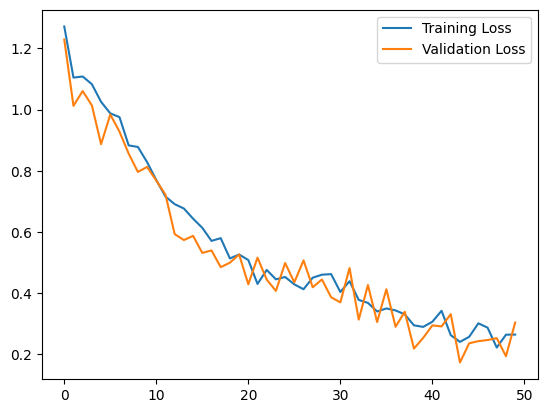

In [14]:
# Entrenamiento y registro de métricas
n_epochs = 50
train_losses = []
val_losses = []

for epoch in range(n_epochs):
    # Forward pass
    outputs = model_dropout(X_train)
    loss = loss_function(outputs, y_train)

    # Backward pass y optimización
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Validación
    val_outputs = model_dropout(X_val)
    val_loss = loss_function(val_outputs, y_val)
    val_losses.append(val_loss.item())

    # Cálculo de precisión
    _, predicted = torch.max(val_outputs, 1)
    accuracy = accuracy_score(y_val, predicted)
    
    print(f'Epoch {epoch+1}, Loss: {loss.item()}, Val Loss: {val_loss.item()}, Accuracy: {accuracy}')

# Visualización de las curvas de pérdida
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.show()
